In [1]:
%matplotlib inline
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
first_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11b159978>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

In [11]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11b10b630>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

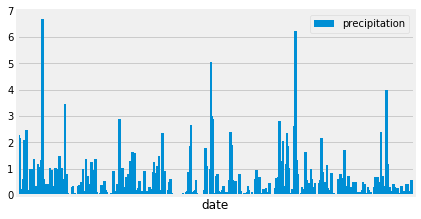

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
sorted_df = df.sort_values("date")
sorted_df

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot.bar(width=15, label = "Precipitation")
plt.tight_layout()
plt.xticks([])
plt.show()

In [17]:
#Find earliest date
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
earliest_date

('2010-01-01')

In [18]:
#Find latest date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [19]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Station.station).group_by(Station.station).count()
locations

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
for row in session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).all():
    print(row)

('USC00511918', 1979)
('USC00513117', 2709)
('USC00514830', 2202)
('USC00516128', 2612)
('USC00517948', 1372)
('USC00518838', 511)
('USC00519281', 2772)
('USC00519397', 2724)
('USC00519523', 2669)


In [23]:
for row in session.query(Measurement.station).all():
    print(row)

('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397'

('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117'

('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117',)
('USC00513117'

('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948',)
('USC00517948'

('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523',)
('USC00519523'

('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281',)
('USC00519281'

('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918',)
('USC00511918'

('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128'

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active = 'USC00519281'

for row in session.query(*sel).filter(Measurement.station == most_active).group_by(Measurement.station).all():
    print(row)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram 

date = dt.datetime(2016, 8, 23)

mostActiveStation = session.query(Measurement.tobs).\
    filter(Measurement.date > date).filter(Measurement.station == most_active).all()
mostActiveStation


[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

Text(0.5,1,'Temperature between August 2016 and August 2017')

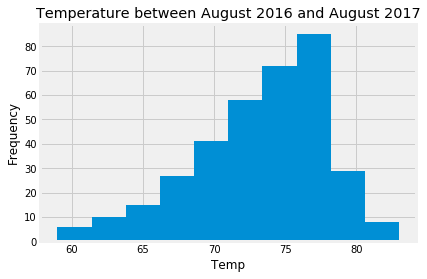

In [35]:
#plot the results of the previous query as a histogram
most_active_df = pd.DataFrame(mostActiveStation, columns=['temp'])
# most_active_df
_=plt.hist(most_active_df['temp'])

plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.title("Temperature between August 2016 and August 2017")

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-04-01','2016-04-08'))

[(65.0, 72.64150943396227, 78.0)]
